In [1]:
#importing the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#reading the dataset
df = pd.read_csv('titanic.csv')

#to change the floating point values to something else and here we've changed it to 2 decimal places
#this is useful for better readability of the data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [3]:
#to get the information about the data, their values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#I'm dropping the column cabin from the whole dataset as it has too many missing values
df = df.drop('Cabin', axis=1)


print("\nDataFrame after dropping column 'B':")
print(df)


DataFrame after dropping column 'B':
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male 22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00      1   
2                               Heikkinen, Miss. Laina  female 26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1   
4                             Allen, Mr. William Henry    male 35.00      0   
..                             

In [5]:
#to find the missing values in the dataset
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
#since age and embarked have missing values, we can fill them with the mean and mode respectively
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#to find the missing values in the dataset after filling them
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

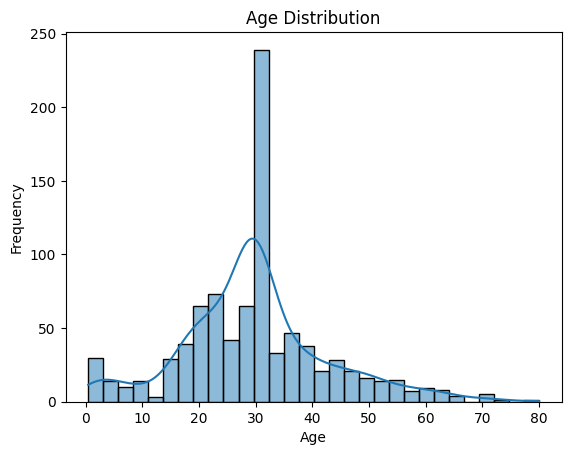

In [7]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

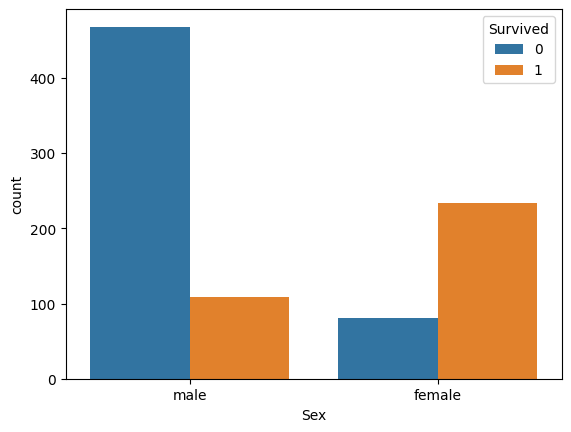

In [9]:
sns.countplot(data=df, x='Sex', hue='Survived')


<Axes: xlabel='Pclass', ylabel='count'>

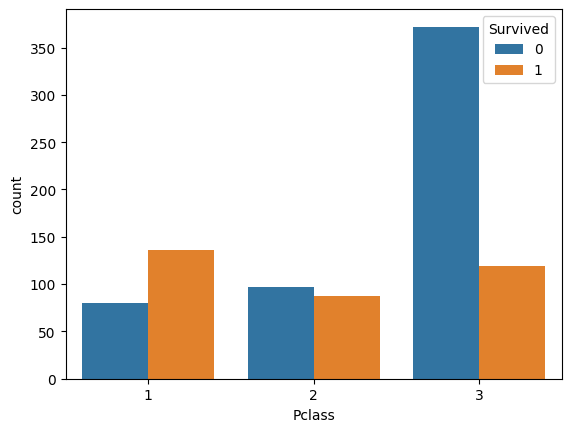

In [10]:
sns.countplot(data=df, x='Pclass', hue='Survived')


<Axes: xlabel='Embarked', ylabel='count'>

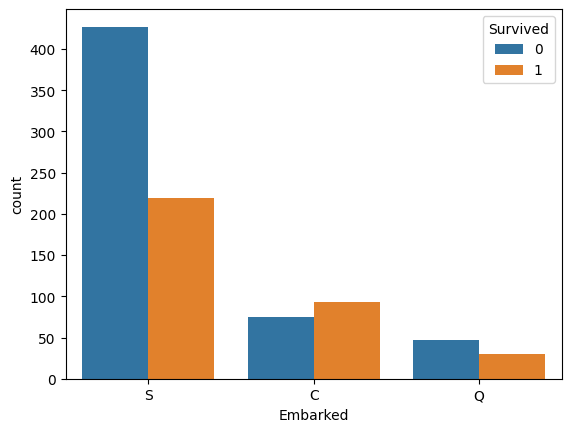

In [11]:
sns.countplot(data=df, x='Embarked', hue='Survived')


<Axes: xlabel='Survived', ylabel='Age'>

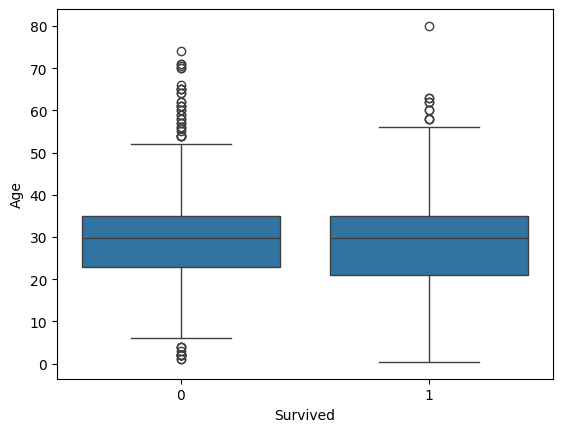

In [12]:
sns.boxplot(data=df, x='Survived', y='Age')

In [15]:
#calculating the correlation between the features

import pandas as pd
df= pd.read_csv('titanic.csv')
df_numeric=df.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

          Survived  Pclass   Age  SibSp  Parch  Fare
Survived      1.00   -0.34 -0.08  -0.04   0.08  0.26
Pclass       -0.34    1.00 -0.37   0.08   0.02 -0.55
Age          -0.08   -0.37  1.00  -0.31  -0.19  0.10
SibSp        -0.04    0.08 -0.31   1.00   0.41  0.16
Parch         0.08    0.02 -0.19   0.41   1.00  0.22
Fare          0.26   -0.55  0.10   0.16   0.22  1.00


In [ ]:
#so pclass and fare have a strong positive correlation, which means that passengers in higher classes tend to pay more for their tickets.
#Age and fare also have a positive correlation, indicating that older passengers tend to pay more for their tickets.